In [34]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.prediction_algorithms.knns import KNNBasic
import matplotlib.pyplot as plt

In [35]:
read = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
dataset = Dataset.load_from_file('ratings_small.csv', reader=read)

In [36]:
# answer to c bit of task 2
import numpy as np
c_models = [
    SVD(),  # Probabilistic Matrix Factorization
    KNNBasic(sim_options={'user_based': True}),  # User-based Collaborative Filtering
    KNNBasic(sim_options={'user_based': False}),  # Item-based Collaborative Filtering
]

metrics = ['mae', 'rmse']
cv = 5
i = 0

while i < len(c_models):
    model = c_models[i]
    print(f'\nModel: {model.__class__.__name__}')
    results_c = cross_validate(model, dataset, measures=metrics, cv=cv, verbose=True)
    
    average_metrics = {metric: np.mean(results_c[f'test_{metric}']) for metric in metrics}
    for metric, average_metric in average_metrics.items():
        print(f'Average {metric}: {average_metric}')
    
    i += 1


Model: SVD
Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6916  0.6917  0.6843  0.6910  0.6974  0.6912  0.0042  
RMSE (testset)    0.8988  0.9002  0.8875  0.8977  0.9063  0.8981  0.0061  
Fit time          0.70    0.75    0.77    0.76    0.76    0.75    0.02    
Test time         0.10    0.16    0.10    0.17    0.12    0.13    0.03    
Average mae: 0.6911884279026126
Average rmse: 0.8981238707093764

Model: KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fol

In [33]:
# answer to d-task2
d_results = {'model_type': [], 'mae': [], 'rmse': []}
index = 0

while index < len(c_models):
    model = c_models[index]
    model_type = 'PMF' if isinstance(model, SVD) else ('User' if model.sim_options['user_based'] else 'Item')
    print(f'\n{model_type}')
    
    results = cross_validate(model, dataset, measures=metrics, cv=cv, verbose=True)
    
    [d_results[metric].append(np.mean(results[f'test_{metric}'])) for metric in metrics]
    [d_results['model_type'].append(model_type) for _ in range(len(metrics))]
    
    index += 1

print('\n')
j = 0
while j < len(d_results):
    key = list(d_results.keys())[j]
    values = d_results[key]
    print(f"{key}: {values}")
    j += 1


print("\nComparison of Average Performances:")
model_types = ['PMF', 'User', 'Item']

for metric in metrics:
    print(f"\nAverage {metric}:")
    for i in range(len(models)):
        model_type = d_results['model_type'][2*i]
        metric_value = d_results[metric][i]
        print(f"{model_type}: {metric_value}")

rmseBest = d_results['model_type'][d_results['rmse'].index(min(d_results['rmse']))]
maeBest = d_results['model_type'][d_results['mae'].index(min(d_results['mae']))]

print(f"\nBest RMSE model: {rmseBest}")
print(f"Best MAE model: {maeBest}")



PMF
Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6967  0.6964  0.6894  0.6882  0.6829  0.6907  0.0052  
RMSE (testset)    0.9025  0.9038  0.8932  0.8960  0.8892  0.8969  0.0055  
Fit time          0.95    0.98    1.10    0.99    0.96    1.00    0.06    
Test time         0.15    0.13    0.23    0.13    0.21    0.17    0.04    

User
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7421  0.7520  0.7458  0.7407  0.7434  0.7

In [24]:
#answer to e-task 2
import matplotlib.pyplot as plt

metrics_common = ['cosine', 'msd', 'pearson']
models = ['user', 'item']

e_results = {}

index_model_type = 0
while index_model_type < len(models):
    model_type = models[index_model_type]
    e_results[model_type] = {'mae': [], 'rmse': []}
    
    index_sim_metric = 0
    while index_sim_metric < len(metrics_common):
        s = metrics_common[index_sim_metric]
        model = KNNBasic(k=40, sim_options={'name': s, 'user_based': model_type == 'user'})
        res = cross_validate(model, dataset, measures=['mae', 'rmse'], cv=5, verbose=True)
        
        [e_results[model_type][metric].append(np.mean(res[f'test_{metric}'])) for metric in ['mae', 'rmse']]
        
        index_sim_metric += 1
    
    index_model_type += 1

# Plot the results
plt.figure(figsize=(4, 4))

colors = ['blue', 'green']
for i, model_type in enumerate(models):
    for j, metric in enumerate(['mae', 'rmse']):
        plt.plot(metrics_common, e_results[model_type][metric], label=f'{model_type.capitalize()} - {metric.upper()}', color=colors[j])

plt.title('Impact of various similarity metrics on the RMSE and MAE of CFs based on users and items.')
plt.xlabel('Metric')
plt.ylabel(' Value of MAE/RMSE')
plt.legend()
plt.show()


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7600  0.7684  0.7676  0.7704  0.7727  0.7678  0.0043  
RMSE (testset)    0.9837  0.9925  0.9926  0.9984  1.0034  0.9942  0.0066  
Fit time          0.38    0.38    0.37    0.37    0.38    0.38    0.01    
Test time         1.20    1.06    1.12    1.09    1.13    1.12    0.05    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


KeyboardInterrupt: 

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

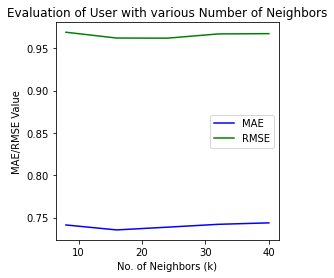

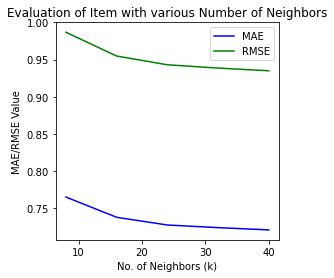

In [30]:
#f answer for task 2
neighbor_values = [8, 16, 24, 32, 40]
f_results = {'user': {'mae': [], 'rmse': []}, 'item': {'mae': [], 'rmse': []}}

model_types = ['user', 'item']
index_model_type = 0

while index_model_type < len(model_types):
    model_type = model_types[index_model_type]
    for k in neighbor_values:
        f_results[model_type]['mae'].append(np.mean(cross_validate(KNNBasic(k=k, sim_options={'user_based': model_type == 'user'}),
                                                                   dataset, measures=['mae'], cv=5)['test_mae']))
        f_results[model_type]['rmse'].append(np.mean(cross_validate(KNNBasic(k=k, sim_options={'user_based': model_type == 'user'}),
                                                                    dataset, measures=['rmse'], cv=5)['test_rmse']))
    
   
    index_model_type += 1

for model_type in ['user', 'item']:
    plt.figure(figsize=(4, 4))
    colors = ['blue', 'green']
    for i, metric in enumerate(metrics):
        plt.plot(neighbor_values, f_results[model_type][metric], label=f'{metric.upper()}', color=colors[i])
        
    plt.title(f'Evaluation of {model_type.capitalize()} with various Number of Neighbors')
    plt.xlabel('No. of Neighbors (k)')
    plt.ylabel('MAE/RMSE Value')
    plt.legend()
    plt.show()


In [31]:
#answer to g -task 2
optimal_k_user = neighbor_values[f_results['user']['rmse'].index(min(f_results['user']['rmse']))]
optimal_k_item = neighbor_values[f_results['item']['rmse'].index(min(f_results['item']['rmse']))]

print(f"Results: {f_results}")
print(f"\nFor User-based CF, the optimal number of neighbors (K) is: {optimal_k_user}")
print(f"For Item-based CF, the optimal number of neighbors (K) is: {optimal_k_item}")


Results: {'user': {'mae': [0.7412737294091023, 0.7354224433135187, 0.7386537112725602, 0.7420314321318402, 0.7437543089043595], 'rmse': [0.9690303427008761, 0.9621739903580935, 0.9620232726241824, 0.967037461824764, 0.9673792513485189]}, 'item': {'mae': [0.7652146627254062, 0.7379722970659742, 0.7276297366005171, 0.7240744061124206, 0.7210075462071662], 'rmse': [0.9868672357163952, 0.9548584397107142, 0.9431238411089871, 0.9386568434429359, 0.9350221667144918]}}

For User-based CF, the optimal number of neighbors (K) is: 24
For Item-based CF, the optimal number of neighbors (K) is: 40
